In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pprint import pprint

In [53]:
data_df=pd.read_csv("Google-Playstore-Full.csv",low_memory=False)
data_df=data_df[["App Name","Category","Rating","Reviews","Installs","Size","Price","Content Rating"]]
data_df.dropna()
data_df=data_df.rename(columns={"App Name":"App_Name"})
data_df

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922,"100,000,000+",Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone
...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone
267048,Pet ads: Buy & Sell,BUSINESS,2.599999905,5,500+,8.4M,0,Everyone
267049,Collectors Market: Buy & Sell,BUSINESS,3.285714388,7,"1,000+",7.9M,0,Everyone
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone


DATA CLEANING

In [54]:
#clean raw data
data_df=data_df[~data_df.App_Name.str.contains("?",na=False,regex=False)]

In [55]:
# clean price
cleaned_df = data_df
cleaned_df=cleaned_df[~cleaned_df.Price.str.contains("M",na=False,regex=False)]
cleaned_df=cleaned_df[~cleaned_df.Price.str.contains("+",na=False,regex=False)]
cleaned_df = cleaned_df[cleaned_df["Price"] != 'Varies with device']
cleaned_df["Price"] = cleaned_df["Price"].str.replace("$","").astype(float)

In [56]:
#clean install number
cleaned_df = cleaned_df[cleaned_df["Installs"] != 'EDUCATION']
cleaned_df = cleaned_df[cleaned_df["Installs"] != ' Xmax X']
cleaned_df["Installs"] = cleaned_df['Installs'].str.split("+").str[0]
cleaned_df["Installs"] = cleaned_df["Installs"].replace(',', "", regex=True)
cleaned_df["Installs"] = cleaned_df["Installs"].astype(float)

In [57]:
# clean rating
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'NEWS_AND_MAGAZINES']
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'GAME_STRATEGY']
cleaned_df["Rating"] = cleaned_df["Rating"].astype(float)
cleaned_df.head()

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034,5000000.0,Varies with device,0.00,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922,100000000.0,Varies with device,0.00,Everyone
2,Peapod,SHOPPING,3.656329,1967,100000.0,1.4M,0.00,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154,10000000.0,16M,0.00,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291,10000.0,Varies with device,5.99,Everyone


In [58]:
#Clean Category
cleaned_df["Category"]=cleaned_df["Category"].replace('_', ' ', regex=True)

In [59]:
#Clean Reviews
cleaned_df["Reviews"]=cleaned_df["Reviews"].astype(float)

In [60]:
#finish data cleaning 
cleaned_df=cleaned_df.rename(columns={"App_Name":"App Name"})
cleaned_df=cleaned_df[~cleaned_df.Category.str.contains(")",regex=False)]
cleaned_df=cleaned_df[~cleaned_df.Category.str.contains("Channel 2 News",regex=False)]
cleaned_df=cleaned_df[~cleaned_df.Category.str.contains("TRAVEL",regex=False)]

In [61]:
# cleaned_df1 is for general categories
cleaned_df1 = cleaned_df.replace(
    {"GAME PUZZLE": "GAME",
"GAME CASUAL": "GAME",
"GAME ARCADE": "GAME",
"GAME ACTION": "GAME",
"GAME SIMULATION": "GAME",
"GAME CARD": "GAME",
"GAME EDUCATIONAL": "GAME",
"GAME ROLE PLAYING": "GAME",
"GAME STRATEGY": "GAME",
"GAME RACING": "GAME",
"GAME ADVENTURE": "GAME",
"GAME SPORTS": "GAME",
"GAME WORD": "GAME",
"GAME BOARD": "GAME",
"GAME CASINO": "GAME",
"GAME TRIVIA": "GAME",
"GAME MUSIC": "GAME",
})
cleaned_df1["Category"].value_counts()

EDUCATION              26886
GAME                   20663
TOOLS                  19817
ENTERTAINMENT          17191
BOOKS AND REFERENCE    15169
MUSIC AND AUDIO        14099
LIFESTYLE              11576
PERSONALIZATION        10199
BUSINESS                9186
FINANCE                 8869
PRODUCTIVITY            8514
PHOTOGRAPHY             6782
NEWS AND MAGAZINES      6756
HEALTH AND FITNESS      6654
SPORTS                  5034
COMMUNICATION           4835
SHOPPING                3924
SOCIAL                  3856
MAPS AND NAVIGATION     3513
MEDICAL                 3291
FOOD AND DRINK          2468
VIDEO PLAYERS           2420
AUTO AND VEHICLES       1752
ART AND DESIGN          1604
WEATHER                 1501
BEAUTY                   746
HOUSE AND HOME           740
EVENTS                   548
LIBRARIES AND DEMO       477
PARENTING                444
COMICS                   397
DATING                   256
Name: Category, dtype: int64

APP ANALYSIS BY CATEGORY

In [62]:
apps=cleaned_df1.groupby(["Category"])
review_category=apps["Reviews"].sum()/1000

In [63]:
category_key=apps.groups.keys()

In [72]:
def fig_plot(apps,category,title,ylabel,xlabel,category_key,fontsize,labelheight,roundnumber, file_path):
    fig, ax = plt.subplots(figsize=(100,50))
    x_index = np.arange(len(apps))  
    total_review = ax.bar(x_index[0:], category, color='lightblue')
    ax.set_title(title,fontsize=100)
    ax.set_ylabel(ylabel,fontsize=80)
    ax.set_xlabel(xlabel,fontsize=80)
    ax.set_xticks(x_index+0.3)
    ax.tick_params(axis="y", labelsize=60)
    ax.set_xticklabels(category_key,fontsize=50)
    plt.xticks(rotation=60, ha='right')
    ax.grid(True)
    
    def label(numbers,fontsize,labelheight,roundnumber):
        for x in numbers:
            height = x.get_height()
            xloc=x.get_x() + x.get_width() / 2
            label=(f'{round(height,roundnumber)}')
            ax.text(xloc,height+labelheight,label,ha='center', va='bottom',color="black",fontsize=fontsize)
    label(total_review,fontsize,labelheight,roundnumber) 
    fig.savefig(file_path)

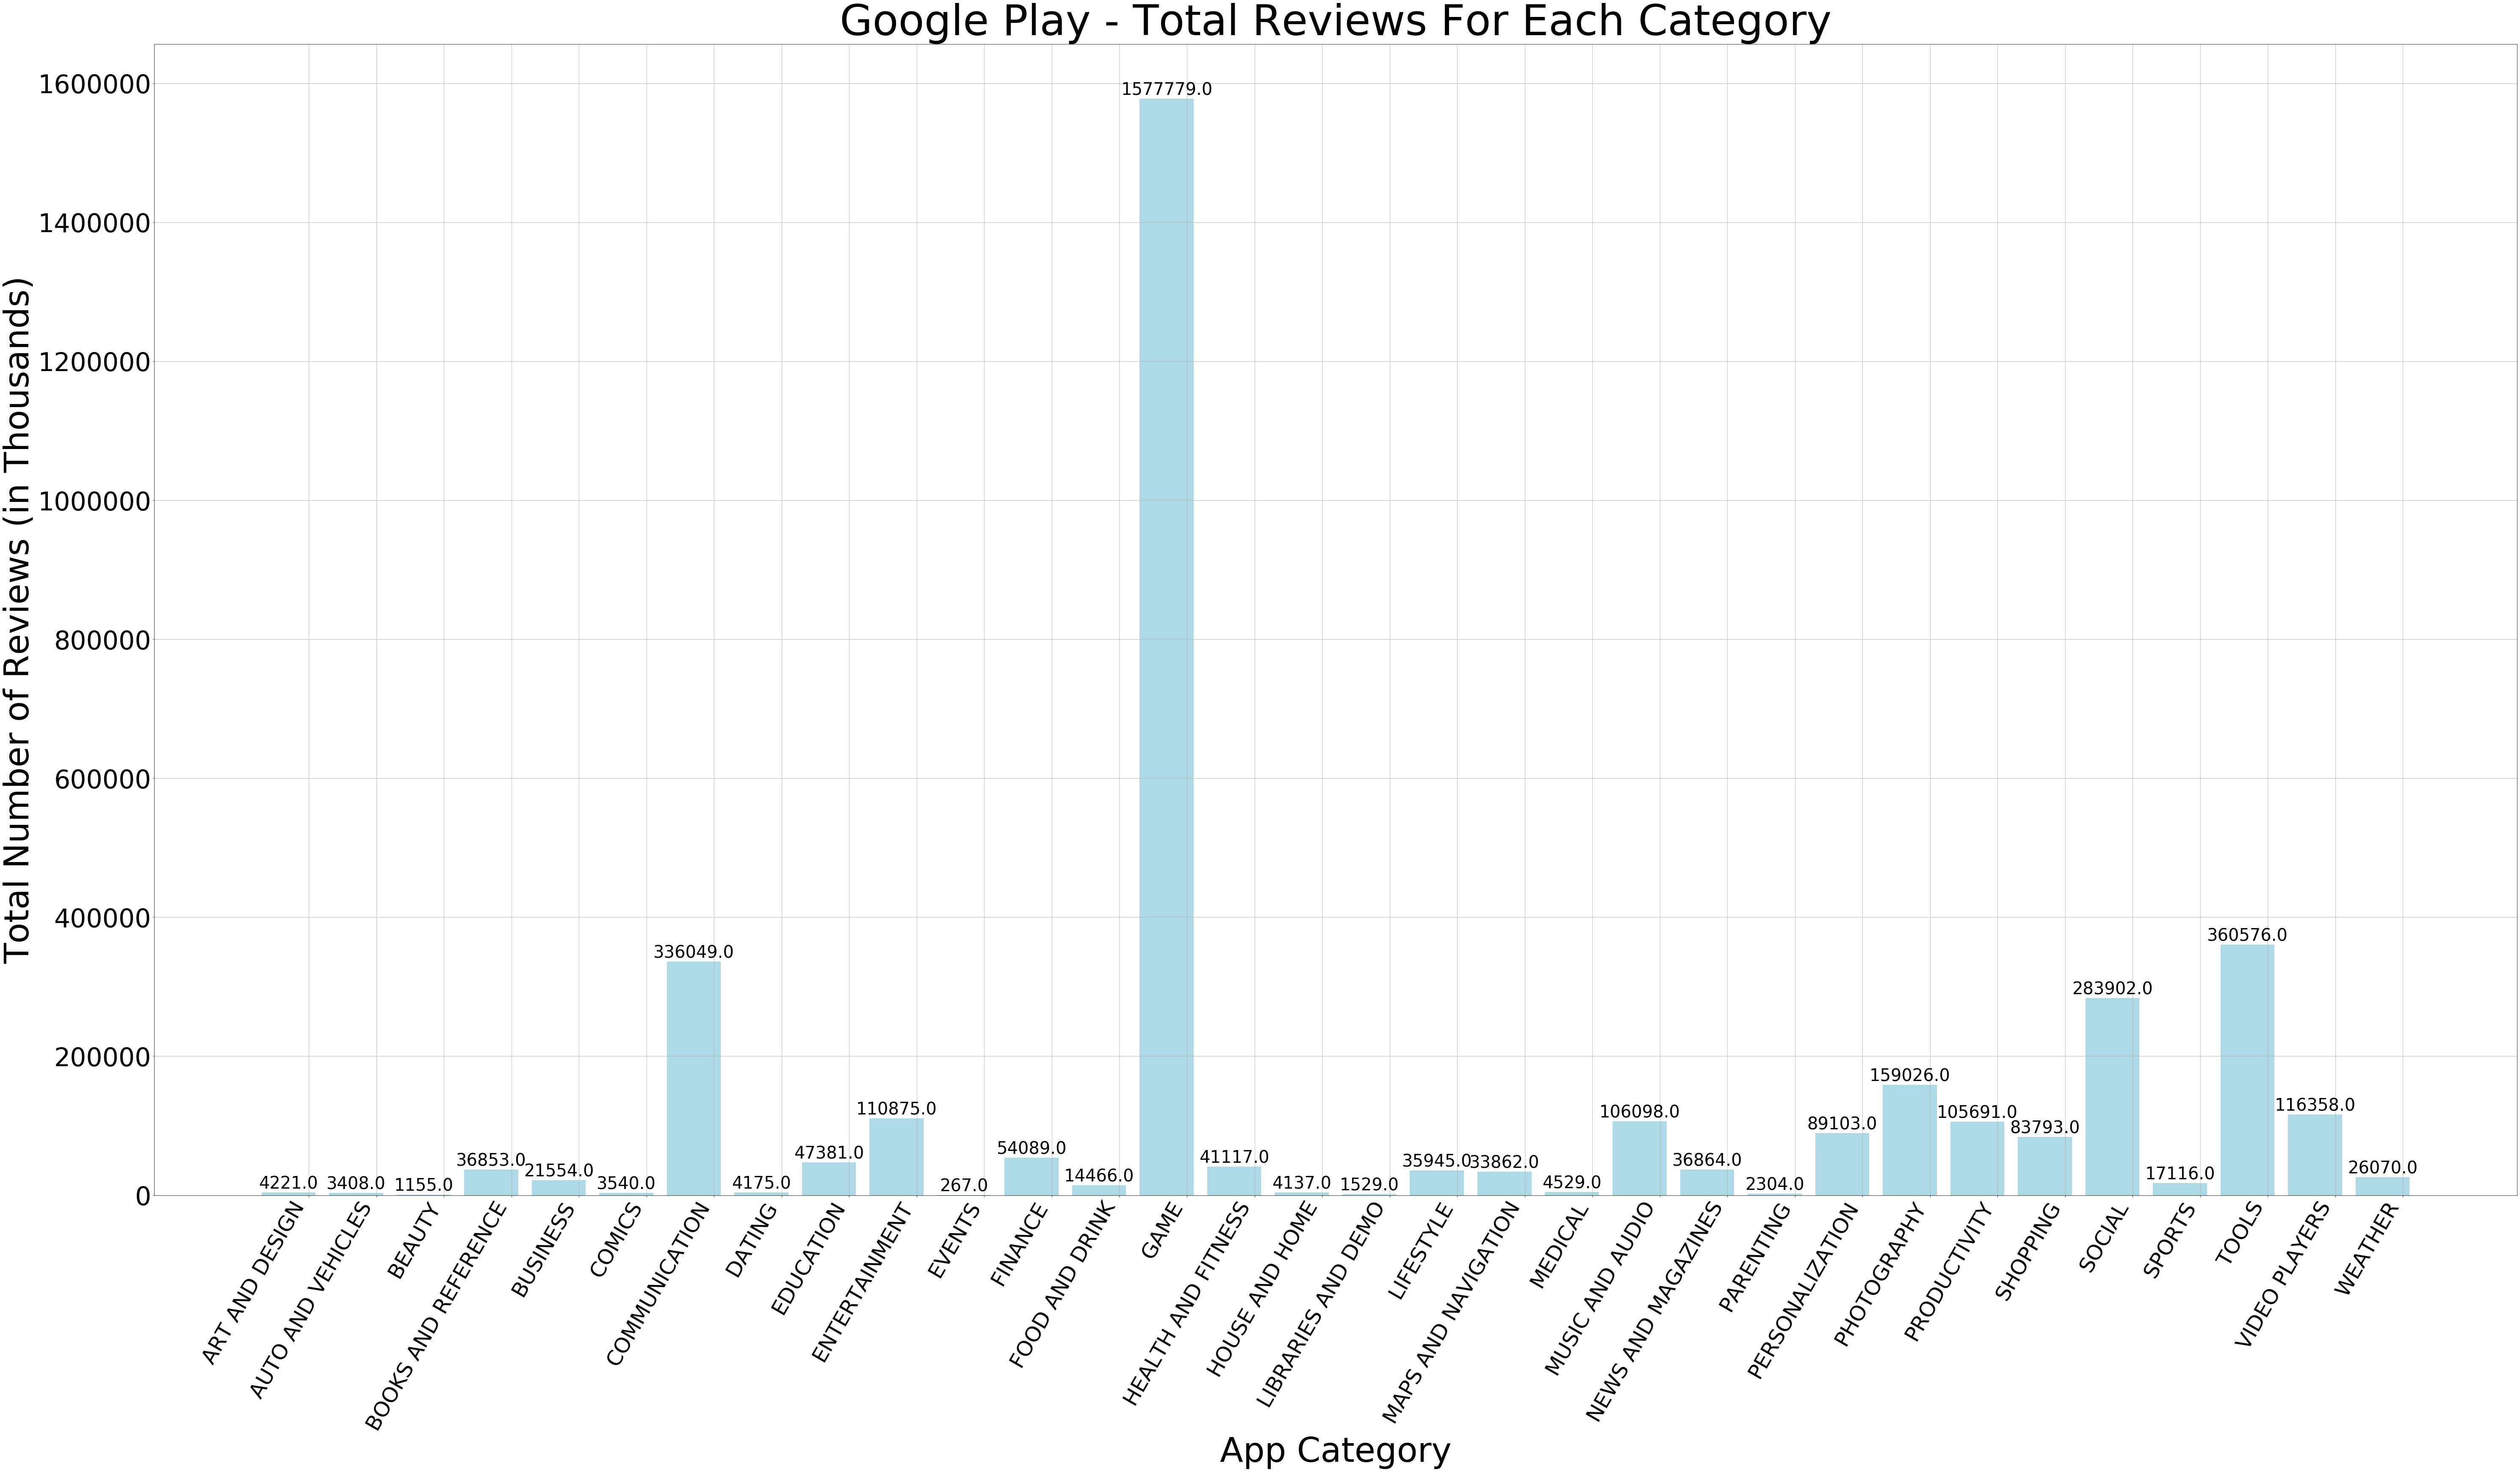

In [73]:
fig_plot(apps["Reviews"], review_category[0:], 'Google Play - Total Reviews For Each Category', 
         'Total Number of Reviews (in Thousands)','App Category',
         category_key,40,100,0, "Results/Category vs. Total Review.png")

In [74]:
avg_rating=apps["Rating"].mean()

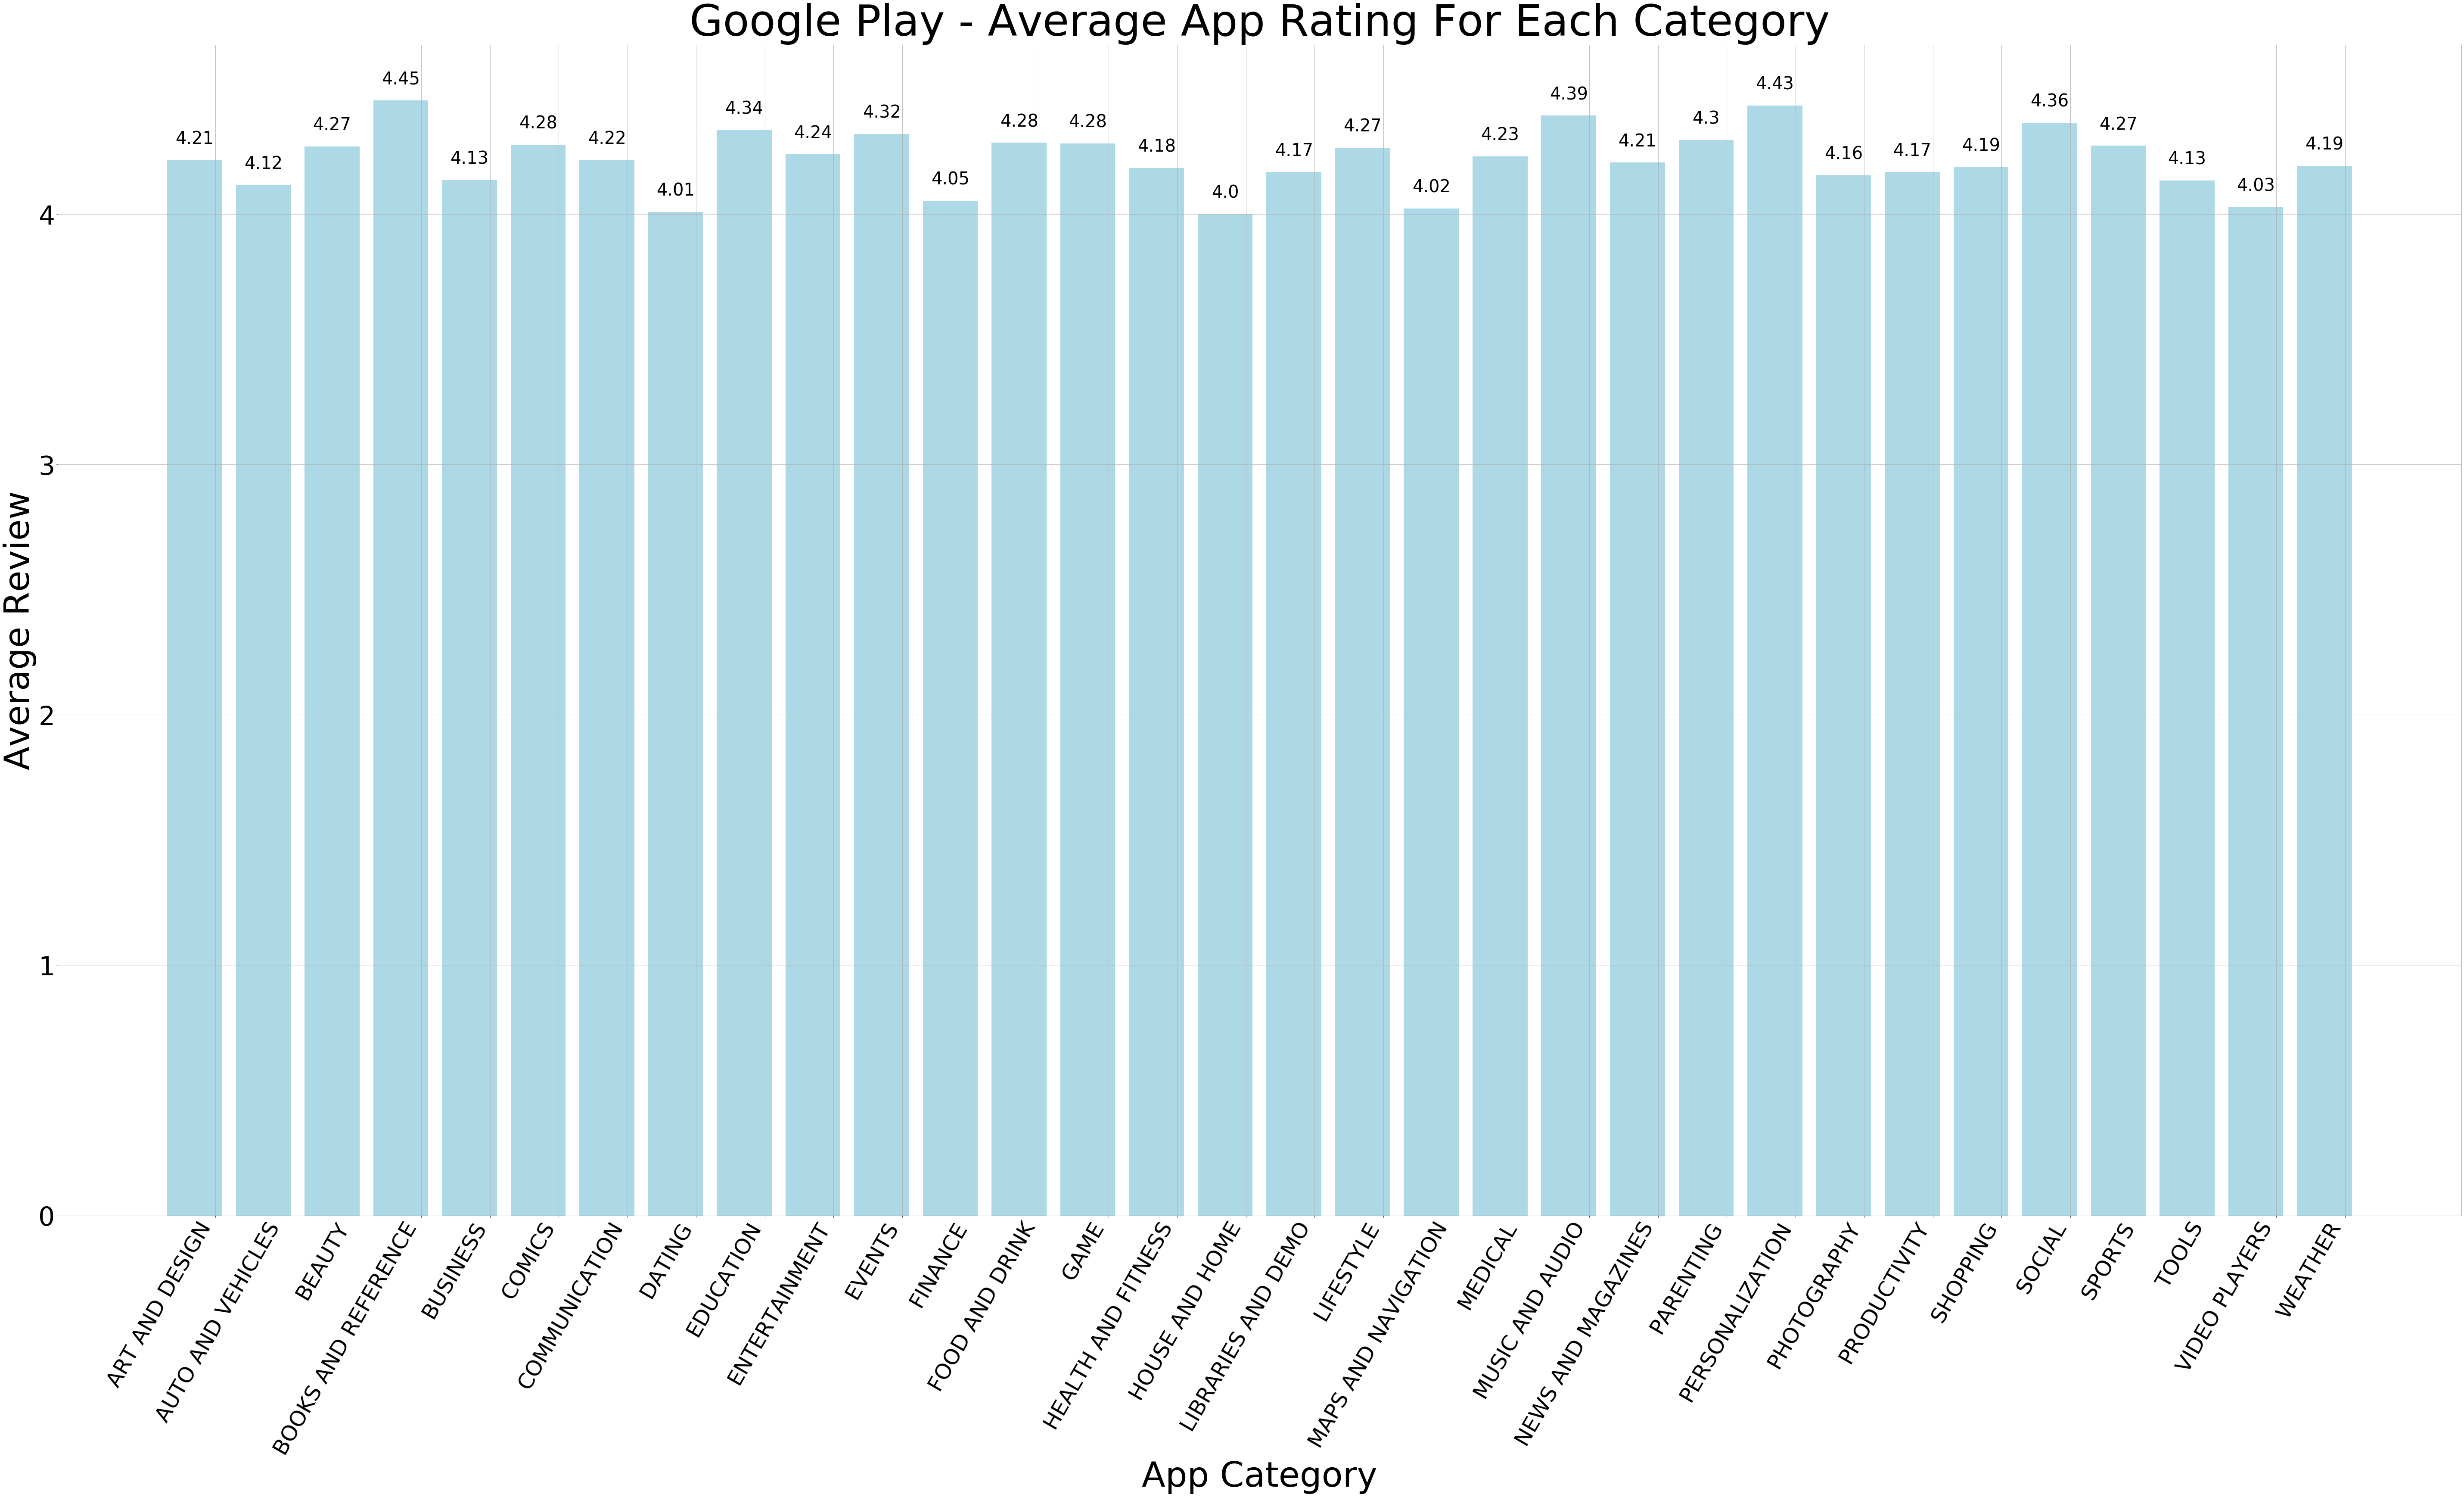

In [75]:
fig_plot(apps["Rating"], avg_rating[0:], 'Google Play - Average App Rating For Each Category', 
         'Average Review','App Category',category_key,40,0.05,2, "Results/Category vs. Agv Rating.png")

In [76]:
paid_app=cleaned_df1[cleaned_df1["Price"]!=0]
free_app=cleaned_df1[cleaned_df1["Price"]==0]
free_count=free_app["App Name"].count()
paid_count=paid_app["App Name"].count()
free_install=free_app["Installs"].sum()
paid_install=paid_app["Installs"].sum()
avg_install_free=free_install/free_count
avg_install_paid=paid_install/paid_count

In [77]:
def label1(numbers,fontsize,labelheight,roundnumber):
    for x in numbers:
        height = x.get_height()
        xloc=x.get_x() + x.get_width() / 2
        label=(f'{round(height,roundnumber)}')
        ax.text(xloc,height+labelheight,label,ha='center', va='bottom',color="black",fontsize=fontsize)

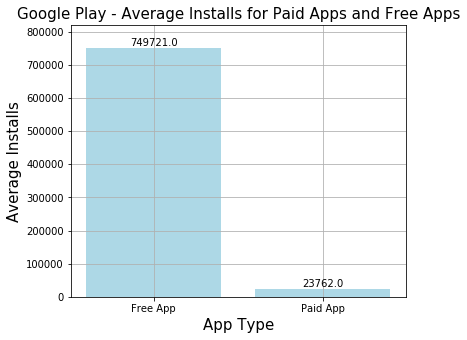

In [78]:
fig,ax = plt.subplots(figsize=(6,5))
x_index = (np.arange(2))  
y_index=(avg_install_free,avg_install_paid)
price_install= ax.bar(x_index[0:], y_index[0:], color='lightblue')
ax.set_title('Google Play - Average Installs for Paid Apps and Free Apps',fontsize=15)
ax.set_ylabel('Average Installs',fontsize=15)
ax.set_xlabel('App Type',fontsize=15)
ax.set_xticks(x_index)
ax.set_ylim([0, 820000])
ax.tick_params(axis="y", labelsize=10)
ax.set_xticklabels(["Free App","Paid App"],fontsize=10)
ax.grid(True)
label1(price_install,10,15,0)

In [79]:
fig.savefig("Results/Price vs. Total Install.png")

GAME APP ANALYSIS

In [80]:
game_df= cleaned_df
game_df=game_df[game_df['Category'].str.contains('GAME', regex=False)]
game_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
46,King of Crabs,GAME ACTION,3.280255,785.0,500000.0,72M,0.0,Everyone 10+
47,Match 3 App Rewards: Daily Game Rewards,GAME CASUAL,4.520161,248.0,10000.0,23M,0.0,Everyone
48,Brown Dust,GAME ROLE PLAYING,4.476288,70260.0,1000000.0,81M,0.0,Teen
49,Poly - Coloring Puzzle Art Book,GAME PUZZLE,4.580865,878.0,10000.0,44M,0.0,Everyone
50,Legend of Empress,GAME ROLE PLAYING,3.820000,750.0,50000.0,24M,0.0,Teen


In [81]:
game_sub=game_df.groupby("Category")
game_review=game_sub["Reviews"].sum()/1000
game_key=game_sub.groups.keys()

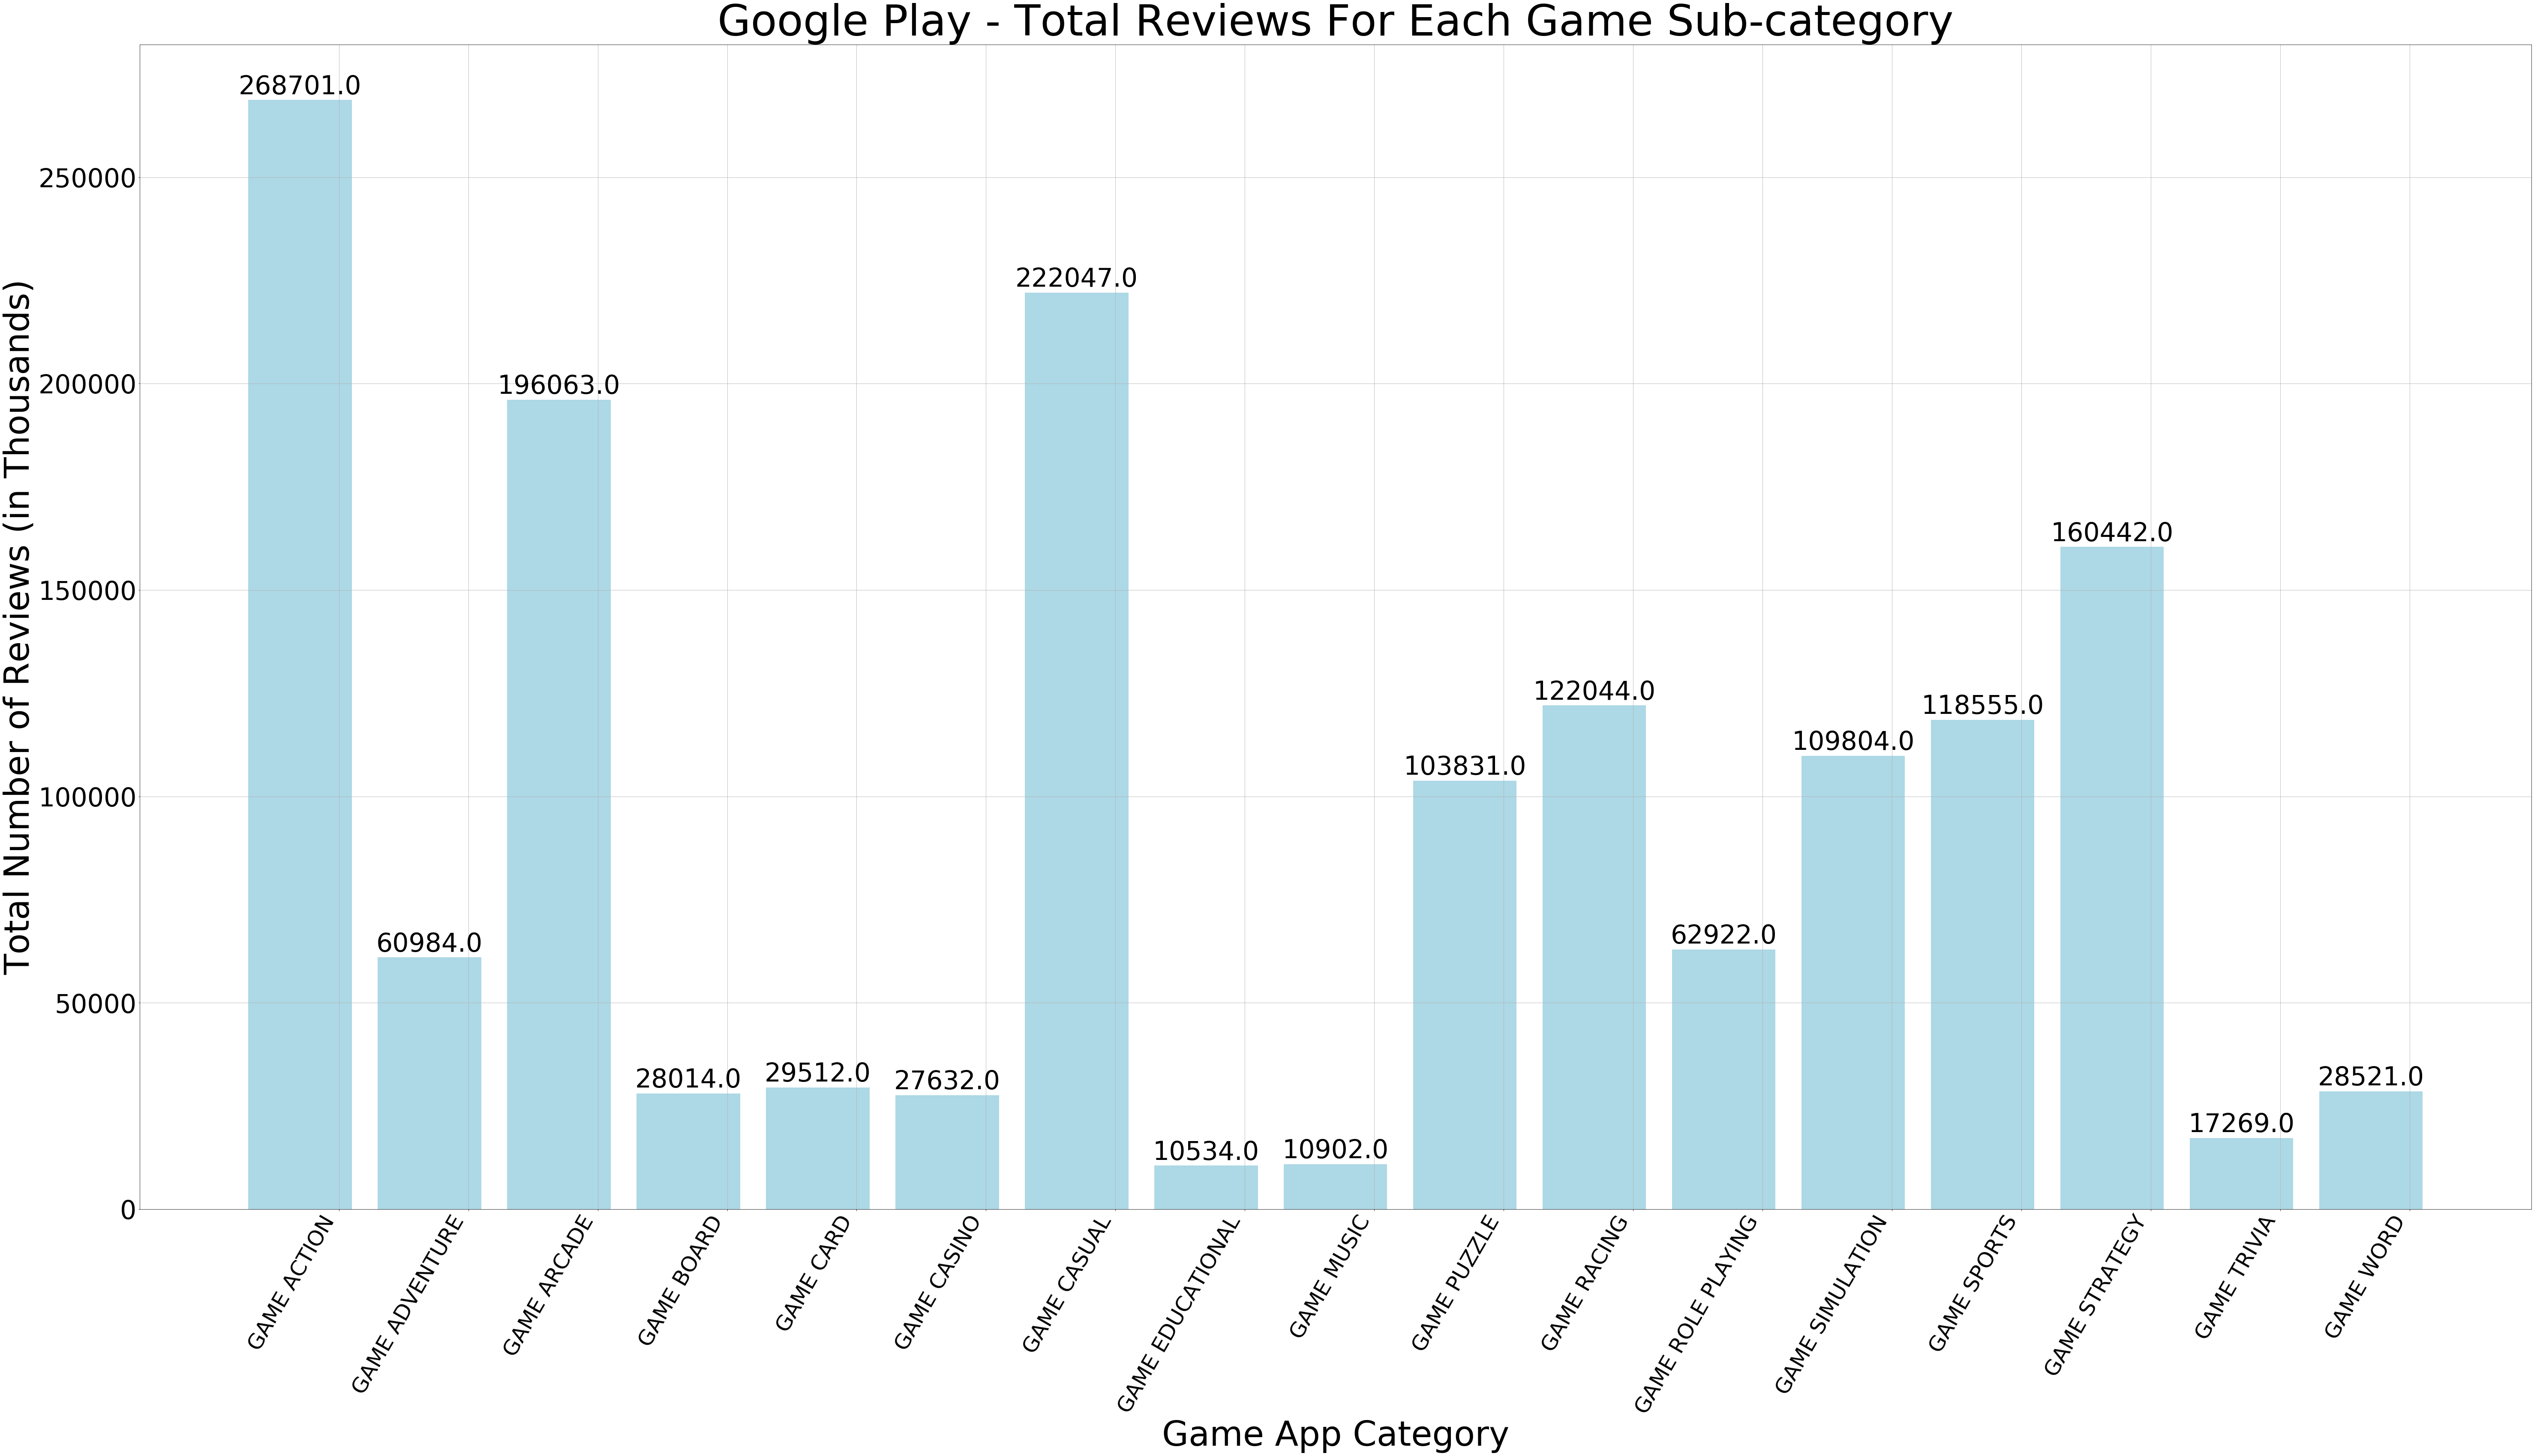

In [82]:
fig_plot(game_sub["Reviews"], game_review[0:], 'Google Play - Total Reviews For Each Game Sub-category', 
         'Total Number of Reviews (in Thousands)',
         'Game App Category',game_key,60,100,0, "Results/Game Category vs. Total Review.png")

In [83]:
game_avg_rating=game_sub["Rating"].mean()

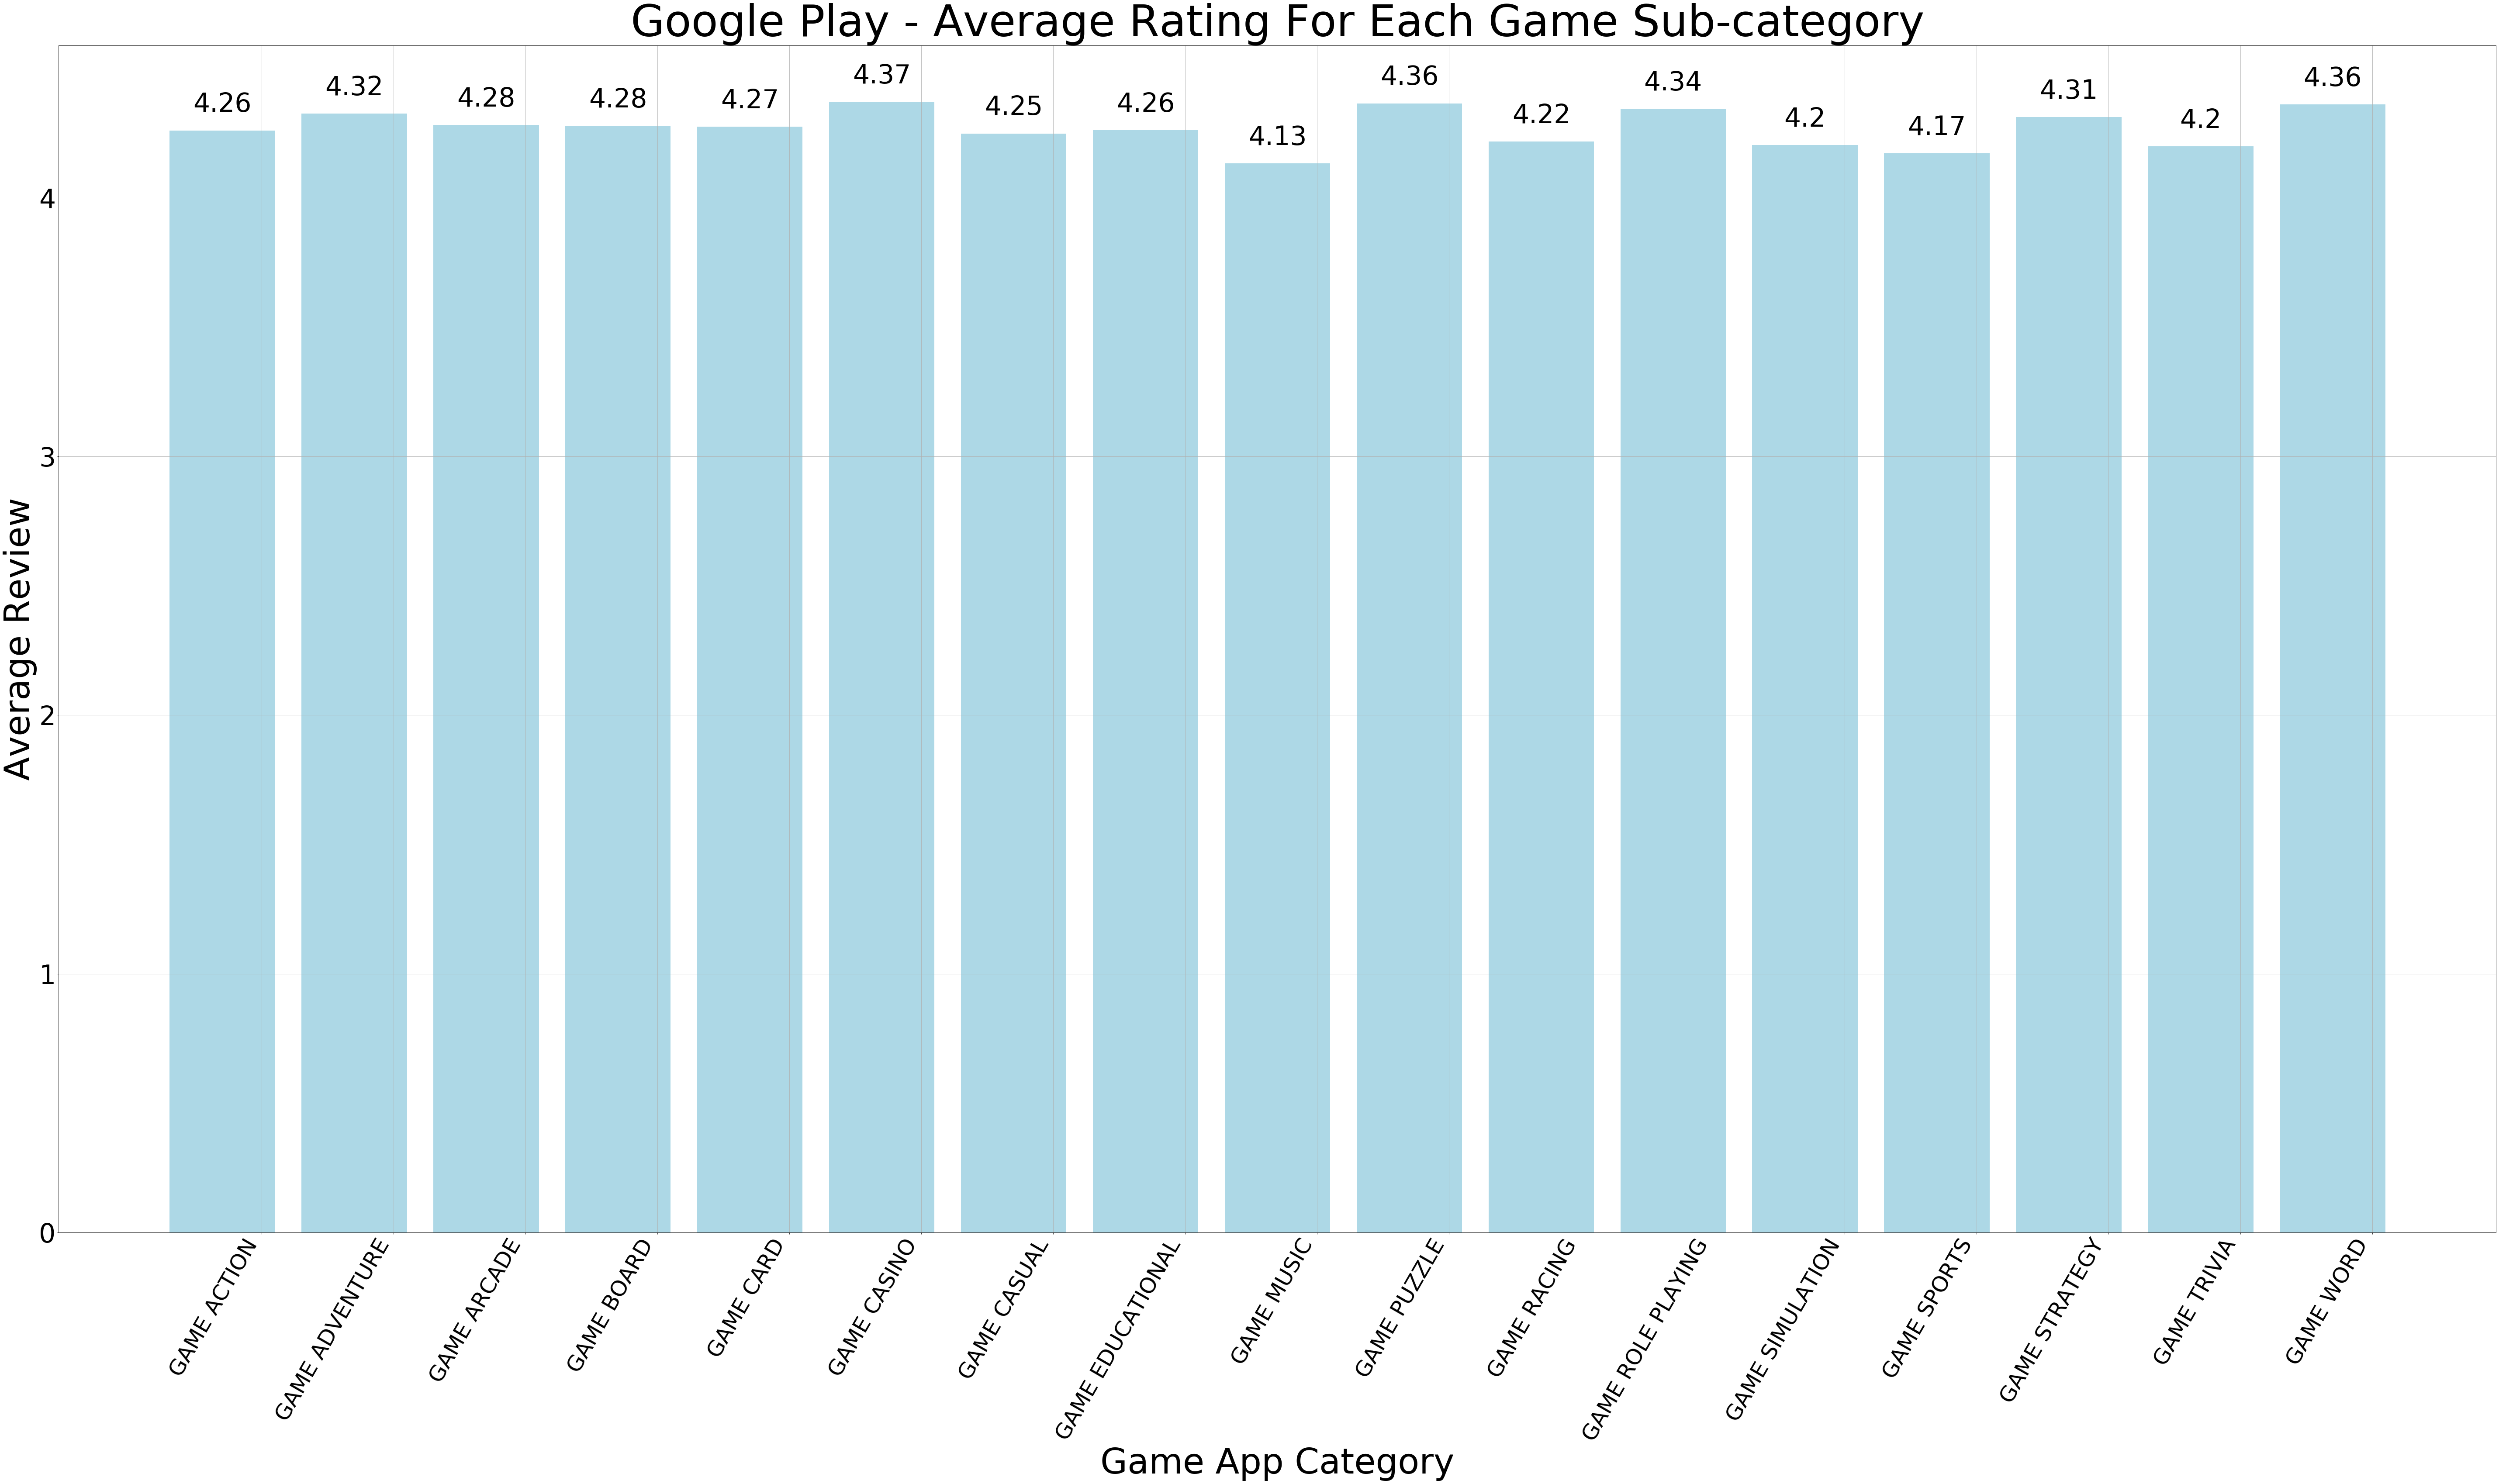

In [84]:
fig_plot(game_sub["Rating"], game_avg_rating[0:], 'Google Play - Average Rating For Each Game Sub-category',
         'Average Review','Game App Category',game_key,60,0.05,2, "Results/Game Category vs. Avg Reviw.png")

In [85]:
paid_game_app=game_df[game_df["Price"]!=0]
free_game_app=game_df[game_df["Price"]==0]
free_game_count=free_game_app["App Name"].count()
paid_game_count=paid_game_app["App Name"].count()
free_game_install=free_game_app["Installs"].sum()
paid_game_install=paid_game_app["Installs"].sum()
avg_install_free_game=free_game_install/free_game_count
avg_install_paid_game=paid_game_install/paid_game_count

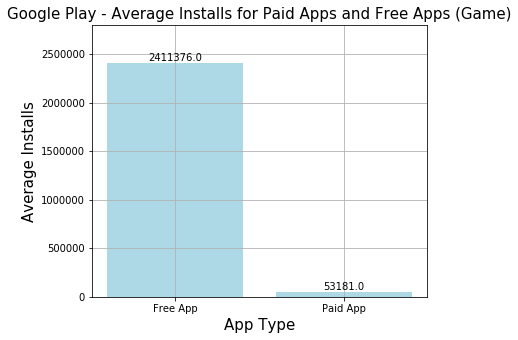

In [86]:
fig,ax = plt.subplots(figsize=(6,5))
x_index = (np.arange(2))  
y_index=(avg_install_free_game,avg_install_paid_game)
game_price_install= ax.bar(x_index[0:], y_index[0:], color='lightblue')
ax.set_title('Google Play - Average Installs for Paid Apps and Free Apps (Game)',fontsize=15)
ax.set_ylabel('Average Installs',fontsize=15)
ax.set_xlabel('App Type',fontsize=15)
ax.set_xticks(x_index)
ax.set_ylim([0, 2800000])
ax.tick_params(axis="y", labelsize=10)
ax.set_xticklabels(["Free App","Paid App"],fontsize=10)
ax.grid(True)
label1(game_price_install,10,15,0)

In [87]:
fig.savefig("Results/Game: Price vs. Total Install.png")

In [88]:
Top_5_install_app = cleaned_df.sort_values(by='Installs', ascending=False).loc[:,('App Name', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_install_app = Top_5_install_app.drop(['index'], axis=1)
Top_5_install_app.head(5)

,App Name,Category,Rating,Reviews,Installs
0,Google,TOOLS,4.408893,10870728.0,5.000000e+09
1,YouTube,VIDEO PLAYERS,4.368428,41919102.0,5.000000e+09
2,Subway Surfers,GAME ARCADE,4.498131,29834812.0,1.000000e+09
3,Gboard - the Google Keyboard,TOOLS,4.335172,2841568.0,1.000000e+09
4,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1.000000e+09


In [89]:
Top_5_Rating_app = cleaned_df.sort_values(by='Rating', ascending=False).loc[:,('App Name', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_Rating_app = Top_5_Rating_app.drop(['index'], axis=1)
Top_5_Rating_app.head(5)

,App Name,Category,Rating,Reviews,Installs
0,W Network Member by WXS,HEALTH AND FITNESS,5.0,6.0,100.0
1,SWAT Dealer,BUSINESS,5.0,5.0,1000.0
2,Somerset 106.1 WYKY FM,MUSIC AND AUDIO,5.0,1.0,100.0
3,ArtClock,PRODUCTIVITY,5.0,1.0,10.0
4,Proverbes & Citations en fran�ais,BOOKS AND REFERENCE,5.0,5.0,500.0


In [90]:
Top_5_Reviews_app = cleaned_df.sort_values(by='Reviews', ascending=False).loc[:,('App Name', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_Reviews_app = Top_5_Reviews_app.drop(['index'], axis=1)
Top_5_Reviews_app.head(5)

,App Name,Category,Rating,Reviews,Installs
0,WhatsApp Messenger,COMMUNICATION,4.417610,86214292.0,1.000000e+09
1,Facebook,SOCIAL,4.087946,85766433.0,1.000000e+09
2,Instagram,SOCIAL,4.519560,79726403.0,1.000000e+09
3,Messenger � Text and Video Chat for Free,COMMUNICATION,4.085856,65469531.0,1.000000e+09
4,Clash of Clans,GAME STRATEGY,4.606215,48401470.0,5.000000e+08
